# Analisis de Datos

In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt


## Cargar Datos

In [2]:
footprint='./data/U.json.individual_footprint'
footprint = pd.read_csv(footprint, sep=",", header=0)
footprint.rename(columns={'customer_id':'customer_tag'}, inplace=True)
footprint.head(3)

,customer_tag,year,week,profile_id,size,d0,d1,d2,d3,d4,d5,d6
0,+++g8j9k+5A=,2016,39,0,1,0,1,0,0,0,0,0
1,+++g8j9k+5A=,2016,25,1,2,0,0,0,0,2,0,0
2,+++g8j9k+5A=,2016,22,2,1,0,0,0,0,0,0,1


In [3]:
individual_cluster='./data/U.json.individual_footprint.labels'
individual_cluster = pd.read_csv(individual_cluster, sep=";", header=0)
individual_cluster.head(3)

,customer_tag,year,week,individual_cluster,d0,d1,d2,d3,d4,d5,d6
0,+++g8j9k+5A=,2016,39,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,+++g8j9k+5A=,2016,25,1,0.0,0.0,0.0,0.0,2.0,0.0,0.0
2,+++g8j9k+5A=,2016,22,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [4]:
collective_cluster='./data/U.json.collective_footprint.labels'
collective_cluster = pd.read_csv(collective_cluster, sep=";", header=0)
collective_cluster.head(3)

,customer_tag,individual_cluster,collective_cluster,d0,d1,d2,d3,d4,d5,d6
0,+++g8j9k+5A=,0,3,0.0,0.000000,2.533742,0.466258,0.000000,0.0,0.0
1,+++g8j9k+5A=,1,17,0.0,0.000000,0.000000,0.000000,1.670455,0.0,0.0
2,+++g8j9k+5A=,2,15,0.0,1.468927,0.000000,0.000000,0.000000,0.0,0.0


## Cohesión de Datos

In [5]:
result = pd.merge(individual_cluster, collective_cluster, on=['customer_tag', 'individual_cluster'])
result= pd.merge(footprint, result, on=['customer_tag','year', 'week'])
result.drop(result.columns[[13,14,15,16,17,18,19,21,22,23,24,25,26,27]], axis=1, inplace=True)

In [6]:
result.head(5)

,customer_tag,year,week,profile_id,size,d0,d1,d2,d3,d4,d5,d6,individual_cluster,collective_cluster
0,+++g8j9k+5A=,2016,39,0,1,0,1,0,0,0,0,0,2,15
1,+++g8j9k+5A=,2016,25,1,2,0,0,0,0,2,0,0,1,17
2,+++g8j9k+5A=,2016,22,2,1,0,0,0,0,0,0,1,4,5
3,+++g8j9k+5A=,2016,26,3,2,0,0,1,0,0,0,1,4,5
4,+++g8j9k+5A=,2016,37,4,1,0,0,0,0,0,1,0,5,13


## Salvar Resultados

In [7]:
result.to_csv('./data/resultados.csv',index=False)

## Grafico

In [8]:
import matplotlib.pyplot as plt

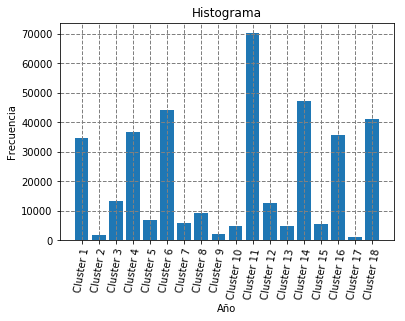

In [9]:
nn= result.groupby(['collective_cluster'], as_index=False, sort=True)['customer_tag'].count()

fig, ax = plt.subplots()
ax.bar(nn.index, nn['customer_tag'], align='center')
ax.grid(color='gray', linestyle='--', linewidth=1)

ax.set_xlabel('Año')
ax.set_xticks(nn.index)

ax.set_ylabel('Frecuencia')
tag =[]
for i in range(len(nn)):
    temp = 'Cluster '+ str(i+1)+''
    tag.append(temp)
    
ax.set_xticklabels(tag, rotation=80)
ax.set_title('Histograma')
plt.show()

### Prueba codigo tabla

In [10]:
"""
from matplotlib import pyplot as plt
import numpy as np
randn = np.random.randn
from pandas import *

idx = Index(np.arange(1,11))
df = DataFrame(randn(10, 5), index=idx, columns=['A', 'B', 'C', 'D', 'E'])
vals = np.around(df.values,2)
normal = plt.Normalize(vals.min()-1, vals.max()+1)

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, frameon=True, xticks=[], yticks=[])

the_table=plt.table(cellText=vals, rowLabels=df.index, colLabels=df.columns, 
                    colWidths = [0.15]*vals.shape[1], loc='center', 
                    cellColours=plt.cm.hot(normal(vals)))
"""

"\nfrom matplotlib import pyplot as plt\nimport numpy as np\nrandn = np.random.randn\nfrom pandas import *\n\nidx = Index(np.arange(1,11))\ndf = DataFrame(randn(10, 5), index=idx, columns=['A', 'B', 'C', 'D', 'E'])\nvals = np.around(df.values,2)\nnormal = plt.Normalize(vals.min()-1, vals.max()+1)\n\nfig = plt.figure(figsize=(15,8))\nax = fig.add_subplot(111, frameon=True, xticks=[], yticks=[])\n\nthe_table=plt.table(cellText=vals, rowLabels=df.index, colLabels=df.columns, \n                    colWidths = [0.15]*vals.shape[1], loc='center', \n                    cellColours=plt.cm.hot(normal(vals)))\n"